# Homework Assignment 5 - Chem 277B
## Flower Image Analysis

### 1) Objective

Before Convolutional Neural Networks (CNN) became available, K-means was an efficient method to segment images. Each pixel is represented by its RGB color vector. If we assume that pixel which belong to the same object should have the same color, then K-means should be able to cluster the pixel accordingly and therefore segment the image.<br> 
We want to analyze the Oxford 102 Flower Dataset using K-means clustering, hierarchical clustering, and decision tree classification and later in the course compare the results we obtain here to what we obtain using CNNs.<br>
<br>

### 2) Preparation

Before starting, we need to import the necessary libraries for data analysis and visualization.<br>
First, we import the standard libraries: 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
from scipy.spatial.distance import pdist, squareform

Next, we need to load the dataset from `torchvision`

In [2]:
from torchvision.datasets import Flowers102 #pip install torchvision if necessary

Finally, we import our clustering methods:

In [3]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<br>

The dataset from `torchvision` contains various flower images and their corresponding labels.<br>
Run the following lines (it might take a few minutes!).

In [8]:
transforms = lambda x: np.array(x) / 255
dataset_train = Flowers102(root='Data', split='train', download=True, transform=transforms)
dataset_val = Flowers102(root='Data', split='val', download=True, transform=transforms)
dataset_test = Flowers102(root='Data', split='test', download=True, transform=transforms)
labels_train = np.array(dataset_train._labels)
labels_val = np.array(dataset_val._labels)
labels_test = np.array(dataset_test._labels)

In [5]:
classes = np.array(["pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea","english marigold","tiger lily", "moon orchid",
    "bird of paradise", "monkshood","globe thistle", "snapdragon","colt's foot","king protea","spear thistle","yellow iris","globe-flower",
    "purple coneflower", "peruvian lily", "balloon flower", "giant white arum lily","fire lily","pincushion flower", "fritillary", "red ginger",
    "grape hyacinth","corn poppy", "prince of wales feathers","stemless gentian","artichoke","sweet william","carnation", "garden phlox",
    "love in the mist","mexican aster", "alpine sea holly", "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",  "lenten rose",
    "barbeton daisy", "daffodil", "sword lily", "poinsettia", "bolero deep blue", "wallflower","marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy","primula", "sunflower","pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?","cautleya spicata", "japanese anemone", "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania", "azalea", "water lily","rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani", "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow", "magnolia",
    "cyclamen",  "watercress", "canna lily", "hippeastrum", "bee balm", "ball moss", "foxglove", "bougainvillea","camellia","mallow","mexican petunia",
    "bromelia", "blanket flower", "trumpet creeper", "blackberry lily"])

<br>

2.1) We can display images in python using `plt.imshow(x)`, where *x* is the image. Show the first image from the dataset to understand what the data looks like.

In [108]:
# help(plt.imshow)

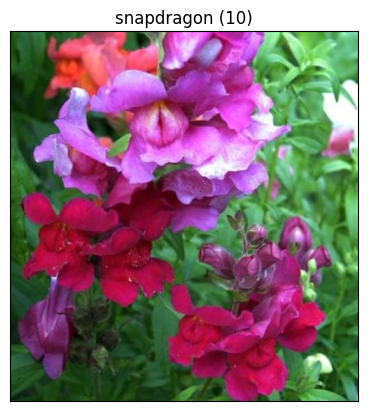

In [81]:
index = 100 #first image
x, y = dataset_train[index] #x: image, y: the label, classes[y]: the actual name of the flower (type str) 

def show(x,y):
    # show image
    plt.imshow(x)
    
    # add title/label and remove tick marks 
    ax = plt.gca()
    ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.title(f"{classes[y]} ({y})")

show(x,y)

2.2) Print the shape and type of the image. Generate three plots, each showing the image only in one color channel in gray scale (`cmap='gray'`)! 

datatype: <class 'numpy.ndarray'>
shape: (531, 500, 3)


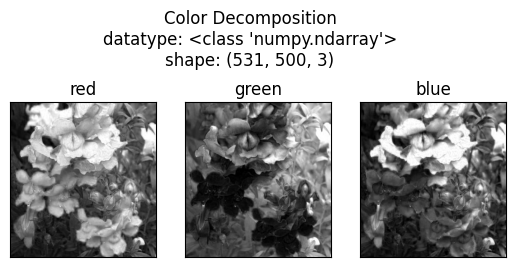

In [88]:
def show_decomposition(x):    
    str_datatype = f"datatype: {type(x)}"
    str_shape = f"shape: {x.shape}"
    print(str_datatype)
    print(str_shape)
    
    colors = ["red", "green", "blue",]
    fig, axs = plt.subplots(ncols=len(colors), squeeze=False)
    fig.suptitle("Color Decomposition\n"  + str_datatype + "\n" + str_shape, y=0.85)
    for i, color in enumerate(colors):
        axs[0,i].imshow(x[:,:,i], cmap='gray')
        axs[0,i].set_title(color)
        axs[0,i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

show_decomposition(x)

<br>

2.3) Show an image in the first 8 classes from the dataset to understand what the data looks like.

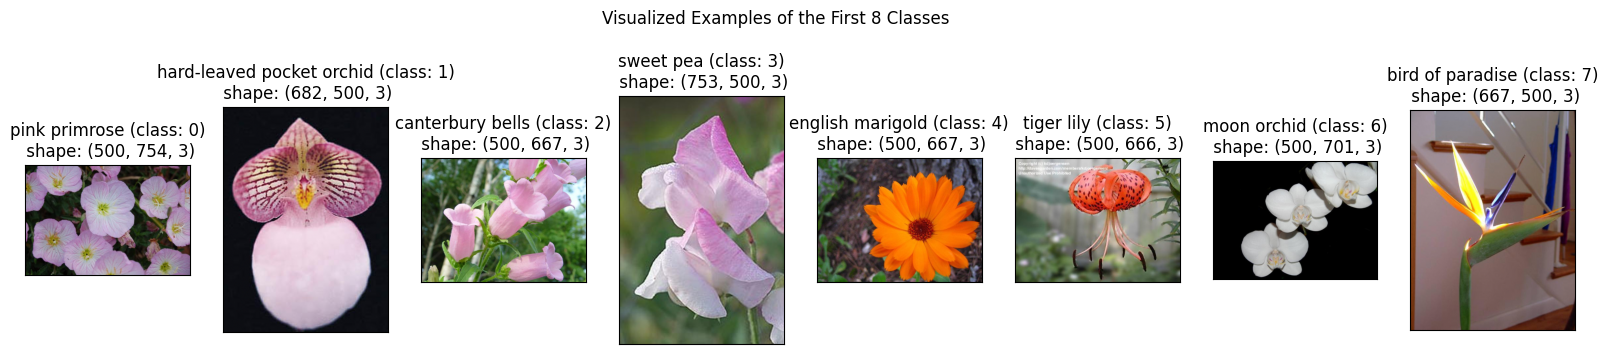

In [110]:
indices = [0, 10, 20, 30, 40, 50, 60, 70]

fig, axs = plt.subplots(ncols=len(indices), squeeze=False, figsize=(20,20))
fig.suptitle("Visualized Examples of the First 8 Classes", y=0.60)
for i, index in enumerate(indices):
        x, y = dataset_train[index]
        axs[0,i].imshow(x)
        axs[0,i].set_title(f"{classes[y]} (class: {y})\n shape: {x.shape}")
        axs[0,i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

### 3) Image Segmentation

3.1) Segment the first image in the training set using K-means clustering. Reshape the image into a 2D array where each row represents a pixel and each column represents a color channel (RGB), and then apply K-means clustering to cluster the pixels. Visualize the segmented image and discuss what you observe.

In [ ]:
index = 0

######## Fill in the code below ########
 
########################################

> your answer here!

3.2) Visualize the center of each cluster as a color using `plt.imshow(colors.reshape(.., .., ..))`. What does this tell you about the image?

In [ ]:
######## Fill in the code below ########

########################################

> your answer here!

<br>

3.3) Reconstruct the image using the cluster centers and the labels assigned to each pixel. Does the reconstructed image capture the main features of the original image? Discuss your observations.

In [ ]:
plt.imshow(colors[pxl_labels].reshape(H, W, C))
plt.axis('off')
plt.title('Reconstructed image')
plt.show()

> your answer here!

<br>

### 4) Image Clustering

4.1) Use hierarchical clustering (`sns.clustermap`) to cluster the first 8 classes of images in the training set. Compute the mean color of the first image in the class and use the mean colors as features. Next, based on the mean colors, generate a distance square matrix (you can use `pdist(your_means, metric='euclidean')`) for clustering. Visualize the resulting dendrogram and discuss what you observe.

In [ ]:
indices = [0, 10, 20, 30, 40, 50, 60, 70]
ticks = classes[labels_train[indices]]

######## Fill in the code below ########

########################################

> your answer here!

<br>

### 5) Classification

5.1) Perform decision tree classification using `DecisionTreeClassifier` to predict the flower species based on the features from the K-means clustering. Train the decision tree classifier for class 0 (pink primrose) and class 4 (english marigold) on the training set and evaluate its performance on the validation set by creating a **confusion matrix plot** for both, training and evaluation set. Discuss why or why not the features from K-means clustering might be effective for this classification task.

In [ ]:
indices_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
indices_val = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

######## Fill in the code below ########
def extract_features(image, n_clusters=2):
....

tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

....
########################################

> your answer here!

Visualize the decision tree and interpret the results. Discuss which features are most important for classification and how well the model performs. You can visualize the features as colors to help interpret the decision tree.

In [ ]:
plt.imshow(x_train.reshape(-1, n_clusters, 3))
plt.axis('off')
plt.title('Training features as colors')
plt.show()

plt.imshow(x_val.reshape(-1, n_clusters, 3))
plt.axis('off')
plt.title('Validation features as colors')
plt.show()

feature_names = [f'cluster{i}-{c}' for i in range(n_clusters) for c in ['red', 'green', 'blue']]
plot_tree(tree, filled=True, feature_names=feature_names, fontsize=10)
plt.show()

> your answer here!

5.2) Try a little more feature engineering by, for example, converting the RGB color space to HSV color space (`image = rgb_to_hsv(image)`) before applying K-means clustering, as well as sorting the cluster centers before flattening them into a feature vector. See if these changes improve the classification performance.

In [ ]:
indices_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
indices_val = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

######## Fill in the code below ########
def extract_features(image, n_clusters=2):

....
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
....
########################################

> your answer here!

5.3) Try your final classification method on class 0 (pink primrose) and class 1 (hard-leaved pocket orchid). How well does it perform? Discuss what kind of features we have not considered that might help improve the classification.

In [ ]:
indices_train = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
indices_val = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

######## Fill in the code below ########

########################################

> your answer here!